In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Reading in and concating csv's

In [2]:
spotify1 =pd.read_csv('../data/merged_years\complete_genre_artist_cleans/fifties_complete.csv')

In [3]:
spotify2 = pd.read_csv('../data/merged_years\complete_genre_artist_cleans/sixties_complete.csv')

In [4]:
spotifytracks1=pd.concat([spotify1,spotify2])

In [5]:
spotifytracks1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 998 entries, 0 to 524
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        998 non-null    int64  
 1   Title             998 non-null    object 
 2   Artist            998 non-null    object 
 3   Artist_Clean      998 non-null    object 
 4   Album             998 non-null    object 
 5   Popularity        998 non-null    int64  
 6   Play Count        998 non-null    int64  
 7   Track URL         998 non-null    object 
 8   Acousticness      998 non-null    float64
 9   Danceability      998 non-null    float64
 10  Loudness          998 non-null    float64
 11  Valence           998 non-null    float64
 12  Energy            998 non-null    float64
 13  Liveness          998 non-null    float64
 14  Tempo             998 non-null    float64
 15  Explicit          998 non-null    bool   
 16  Instrumentalness  998 non-null    float64
 1

In [6]:
spotify3 =pd.read_csv('../data/merged_years\complete_genre_artist_cleans/seventies_complete.csv')

In [7]:
spotify4 =pd.read_csv('../data/merged_years\complete_genre_artist_cleans/eighties_complete.csv')

In [8]:
spotifytracks2=pd.concat([spotify3,spotify4])

In [9]:
spotifytracks2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2000 non-null   int64  
 1   Title             2000 non-null   object 
 2   Artist            2000 non-null   object 
 3   Artist_Clean      2000 non-null   object 
 4   Album             2000 non-null   object 
 5   Popularity        2000 non-null   int64  
 6   Play Count        2000 non-null   int64  
 7   Track URL         2000 non-null   object 
 8   Acousticness      2000 non-null   float64
 9   Danceability      2000 non-null   float64
 10  Loudness          2000 non-null   float64
 11  Valence           2000 non-null   float64
 12  Energy            2000 non-null   float64
 13  Liveness          2000 non-null   float64
 14  Tempo             2000 non-null   float64
 15  Explicit          2000 non-null   bool   
 16  Instrumentalness  2000 non-null   float64
 

In [10]:
spotify5 =pd.read_csv('../data/merged_years\complete_genre_artist_cleans/nineties_completed.csv')

In [11]:
spotify6 =pd.read_csv('../data/merged_years\complete_genre_artist_cleans/twothousands_completed.csv')

In [12]:
spotifytracks3=pd.concat([spotify5,spotify6])

In [13]:
spotifytracks3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1998 entries, 0 to 998
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1998 non-null   int64  
 1   Title             1998 non-null   object 
 2   Artist            1998 non-null   object 
 3   Artist_Clean      1998 non-null   object 
 4   Album             1998 non-null   object 
 5   Popularity        1998 non-null   int64  
 6   Play Count        1998 non-null   float64
 7   Track URL         1998 non-null   object 
 8   Acousticness      1998 non-null   float64
 9   Danceability      1998 non-null   float64
 10  Loudness          1998 non-null   float64
 11  Valence           1998 non-null   float64
 12  Energy            1998 non-null   float64
 13  Liveness          1998 non-null   float64
 14  Tempo             1998 non-null   float64
 15  Explicit          1998 non-null   bool   
 16  Instrumentalness  1998 non-null   float64
 

In [14]:
spotify7 =pd.read_csv('../data/merged_years\complete_genre_artist_cleans/thousandteen_complete.csv')

In [15]:
spotify8 =pd.read_csv('../data/merged_years\complete_genre_artist_cleans/the20s_complete.csv')

In [16]:
spotifytracks4=pd.concat([spotify7,spotify8])

In [17]:
spotifytracks4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1365 entries, 0 to 334
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1365 non-null   int64  
 1   Title             1365 non-null   object 
 2   Artist            1365 non-null   object 
 3   Artist_Clean      1365 non-null   object 
 4   Album             1365 non-null   object 
 5   Popularity        1365 non-null   int64  
 6   Play Count        1365 non-null   int64  
 7   Track URL         1365 non-null   object 
 8   Acousticness      1365 non-null   float64
 9   Danceability      1365 non-null   float64
 10  Loudness          1365 non-null   float64
 11  Valence           1365 non-null   float64
 12  Energy            1365 non-null   float64
 13  Liveness          1365 non-null   float64
 14  Tempo             1365 non-null   float64
 15  Explicit          1365 non-null   bool   
 16  Instrumentalness  1365 non-null   float64
 

In [18]:
spotify_merged = pd.concat([spotifytracks1,spotifytracks2])

In [19]:
spotify_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2998 entries, 0 to 999
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2998 non-null   int64  
 1   Title             2998 non-null   object 
 2   Artist            2998 non-null   object 
 3   Artist_Clean      2998 non-null   object 
 4   Album             2998 non-null   object 
 5   Popularity        2998 non-null   int64  
 6   Play Count        2998 non-null   int64  
 7   Track URL         2998 non-null   object 
 8   Acousticness      2998 non-null   float64
 9   Danceability      2998 non-null   float64
 10  Loudness          2998 non-null   float64
 11  Valence           2998 non-null   float64
 12  Energy            2998 non-null   float64
 13  Liveness          2998 non-null   float64
 14  Tempo             2998 non-null   float64
 15  Explicit          2998 non-null   bool   
 16  Instrumentalness  2998 non-null   float64
 

In [20]:
sptofiy_merge2=pd.concat([spotifytracks3,spotifytracks4])

In [21]:
sptofiy_merge2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3363 entries, 0 to 334
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        3363 non-null   int64  
 1   Title             3363 non-null   object 
 2   Artist            3363 non-null   object 
 3   Artist_Clean      3363 non-null   object 
 4   Album             3363 non-null   object 
 5   Popularity        3363 non-null   int64  
 6   Play Count        3363 non-null   float64
 7   Track URL         3363 non-null   object 
 8   Acousticness      3363 non-null   float64
 9   Danceability      3363 non-null   float64
 10  Loudness          3363 non-null   float64
 11  Valence           3363 non-null   float64
 12  Energy            3363 non-null   float64
 13  Liveness          3363 non-null   float64
 14  Tempo             3363 non-null   float64
 15  Explicit          3363 non-null   bool   
 16  Instrumentalness  3363 non-null   float64
 

In [22]:
spotifytracks=pd.concat([spotify_merged,sptofiy_merge2])

In [23]:
spotifytracks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6361 entries, 0 to 334
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        6361 non-null   int64  
 1   Title             6361 non-null   object 
 2   Artist            6361 non-null   object 
 3   Artist_Clean      6361 non-null   object 
 4   Album             6361 non-null   object 
 5   Popularity        6361 non-null   int64  
 6   Play Count        6361 non-null   float64
 7   Track URL         6361 non-null   object 
 8   Acousticness      6361 non-null   float64
 9   Danceability      6361 non-null   float64
 10  Loudness          6361 non-null   float64
 11  Valence           6361 non-null   float64
 12  Energy            6361 non-null   float64
 13  Liveness          6361 non-null   float64
 14  Tempo             6361 non-null   float64
 15  Explicit          6361 non-null   bool   
 16  Instrumentalness  6361 non-null   float64
 

In [24]:
##Dropping columns not needed
spotifytracks=spotifytracks.drop(columns=['Unnamed: 0','Artist', 'Play Count', 'Genres'])

In [25]:
##Renaming columns to show Artist and specificng Release as Year (since some tracks appear more times than one in top hits)
spotifytracks=spotifytracks.rename(columns={'Artist_Clean':'Artist','Release Year':'Year'})

In [26]:
spotifytracks

,Title,Artist,Album,Popularity,Track URL,Acousticness,Danceability,Loudness,Valence,Energy,Liveness,Tempo,Explicit,Instrumentalness,Duration (ms),Sub_Genre,Main Genre,Year
0,"Bad, Bad Whiskey",Amos Milburn,Let's Have A Party! (The Aladdin Recordings),25,https://open.spotify.com/track/1XByDNjGTqsqkl7...,0.9740,0.874,-10.500,0.6580,0.246,0.1320,115.146,False,0.01110,175093,piano blues,Blues,1950
1,"One Scotch, One Bourbon, One Beer",Amos Milburn,Down The Road Apiece -The Best Of Amos Milburn,50,https://open.spotify.com/track/1T7ZI5Z9XHFeSZU...,0.8110,0.908,-17.630,0.2810,0.133,0.0707,118.678,False,0.09380,176240,piano blues,Blues,1953
2,Let Me Go Home Whiskey,Amos Milburn,Let's Have A Party! (The Aladdin Recordings),29,https://open.spotify.com/track/33343QHpDEcf022...,0.9760,0.908,-12.726,0.7220,0.366,0.1320,121.300,False,0.01290,167787,piano blues,Blues,1953
3,Stack-A'Lee,Archibald,"Saga Blues: New Orleans Rhythm and Blues ""Good...",3,https://open.spotify.com/track/141cfH3W9II7dWJ...,0.9910,0.802,-15.019,0.7850,0.206,0.1240,125.915,False,0.89500,270213,new orleans soul,Soul,1950
4,My Baby Left Me - Remastered 2003,"Arthur ""Big Boy"" Crudup",Rock Me Mama - When The Sun Goes Down Series,36,https://open.spotify.com/track/5WgAbfjSEt2ycl9...,0.8100,0.788,-11.888,0.8430,0.526,0.0975,108.290,False,0.00000,141267,blues,Blues,1951
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,Falling,Trevor Daniel,Nicotine,2,https://open.spotify.com/track/2rRJrJEo19S2J82...,0.1230,0.784,-8.756,0.2360,0.430,0.0887,127.087,False,0.00000,159382,melodic rap,Hip-Hop,2020
331,Past Life (with Selena Gomez),Trevor Daniel,Past Life (with Selena Gomez),65,https://open.spotify.com/track/7MN8RYSofZsFROB...,0.1020,0.575,-5.062,0.2830,0.543,0.1760,159.905,False,0.00000,186480,melodic rap,Hip-Hop,2020
332,Level of Concern,Twenty One Pilots,Level of Concern,69,https://open.spotify.com/track/6xZ4Q2k2ompmDpp...,0.3200,0.754,-7.340,0.7700,0.583,0.1440,122.012,False,0.00015,220051,pop,Hip-Hop,2020
333,t r a n s p a r e n t s o u l feat. Travis Barker,WILLOW,t r a n s p a r e n t s o u l feat. Travis Barker,67,https://open.spotify.com/track/1QL7nSDZCwZMnbi...,0.0021,0.390,-5.201,0.1910,0.830,0.1560,90.021,True,0.00000,168030,pop,Pop,2021


In [27]:
spotifytracks.to_csv('../data/unalteredtracks.csv')

## General stats for dataframe

In [28]:
spotifytracks.describe()

,Popularity,Acousticness,Danceability,Loudness,Valence,Energy,Liveness,Tempo,Instrumentalness,Duration (ms),Year
count,6361.000000,6361.000000,6361.000000,6361.000000,6361.000000,6361.000000,6361.000000,6361.000000,6361.000000,6.361000e+03,6361.000000
mean,64.016035,0.256510,0.623213,-8.138168,0.606678,0.640512,0.176916,120.069744,0.029750,2.303158e+05,1990.553529
std,16.518688,0.272342,0.149741,3.476415,0.240219,0.198377,0.141581,27.412132,0.122789,6.461397e+04,19.512583
min,0.000000,0.000005,0.135000,-24.947000,0.037700,0.020600,0.009670,50.937000,0.000000,9.286700e+04,1950.000000
25%,57.000000,0.033000,0.530000,-10.304000,0.421000,0.507000,0.086100,99.873000,0.000000,1.903330e+05,1975.000000
50%,67.000000,0.149000,0.637000,-7.495000,0.631000,0.664000,0.122000,119.051000,0.000007,2.239730e+05,1991.000000
75%,75.000000,0.413000,0.729000,-5.481000,0.809000,0.800000,0.229000,134.962000,0.000805,2.597200e+05,2007.000000
max,100.000000,0.995000,0.980000,1.085000,0.989000,0.999000,0.989000,216.764000,0.985000,1.561133e+06,2022.000000


In [29]:
##function to create decades column
def decade(year):
    if 2020 <= year <= 2022:
        return "2020's"
    elif 2010 <= year <= 2019:
        return "2010's"
    elif 2000 <= year <= 2009:
        return "2000's"
    elif 1990 <= year <= 1999:
        return "1990's"
    elif 1980 <= year <= 1989:
        return "1980's"
    elif 1970 <= year <= 1979:
        return "1970's"
    elif 1960 <= year <= 1969:
        return "1960's"
    elif 1950 <= year <= 1959:
        return "1950's"
    else:
        return "Other"

In [30]:
##Creating a new column to group years into decades
spotifytracks['Decade'] = spotifytracks['Year'].apply(decade)

In [31]:
spotifytracks

,Title,Artist,Album,Popularity,Track URL,Acousticness,Danceability,Loudness,Valence,Energy,Liveness,Tempo,Explicit,Instrumentalness,Duration (ms),Sub_Genre,Main Genre,Year,Decade
0,"Bad, Bad Whiskey",Amos Milburn,Let's Have A Party! (The Aladdin Recordings),25,https://open.spotify.com/track/1XByDNjGTqsqkl7...,0.9740,0.874,-10.500,0.6580,0.246,0.1320,115.146,False,0.01110,175093,piano blues,Blues,1950,1950's
1,"One Scotch, One Bourbon, One Beer",Amos Milburn,Down The Road Apiece -The Best Of Amos Milburn,50,https://open.spotify.com/track/1T7ZI5Z9XHFeSZU...,0.8110,0.908,-17.630,0.2810,0.133,0.0707,118.678,False,0.09380,176240,piano blues,Blues,1953,1950's
2,Let Me Go Home Whiskey,Amos Milburn,Let's Have A Party! (The Aladdin Recordings),29,https://open.spotify.com/track/33343QHpDEcf022...,0.9760,0.908,-12.726,0.7220,0.366,0.1320,121.300,False,0.01290,167787,piano blues,Blues,1953,1950's
3,Stack-A'Lee,Archibald,"Saga Blues: New Orleans Rhythm and Blues ""Good...",3,https://open.spotify.com/track/141cfH3W9II7dWJ...,0.9910,0.802,-15.019,0.7850,0.206,0.1240,125.915,False,0.89500,270213,new orleans soul,Soul,1950,1950's
4,My Baby Left Me - Remastered 2003,"Arthur ""Big Boy"" Crudup",Rock Me Mama - When The Sun Goes Down Series,36,https://open.spotify.com/track/5WgAbfjSEt2ycl9...,0.8100,0.788,-11.888,0.8430,0.526,0.0975,108.290,False,0.00000,141267,blues,Blues,1951,1950's
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,Falling,Trevor Daniel,Nicotine,2,https://open.spotify.com/track/2rRJrJEo19S2J82...,0.1230,0.784,-8.756,0.2360,0.430,0.0887,127.087,False,0.00000,159382,melodic rap,Hip-Hop,2020,2020's
331,Past Life (with Selena Gomez),Trevor Daniel,Past Life (with Selena Gomez),65,https://open.spotify.com/track/7MN8RYSofZsFROB...,0.1020,0.575,-5.062,0.2830,0.543,0.1760,159.905,False,0.00000,186480,melodic rap,Hip-Hop,2020,2020's
332,Level of Concern,Twenty One Pilots,Level of Concern,69,https://open.spotify.com/track/6xZ4Q2k2ompmDpp...,0.3200,0.754,-7.340,0.7700,0.583,0.1440,122.012,False,0.00015,220051,pop,Hip-Hop,2020,2020's
333,t r a n s p a r e n t s o u l feat. Travis Barker,WILLOW,t r a n s p a r e n t s o u l feat. Travis Barker,67,https://open.spotify.com/track/1QL7nSDZCwZMnbi...,0.0021,0.390,-5.201,0.1910,0.830,0.1560,90.021,True,0.00000,168030,pop,Pop,2021,2020's


In [32]:
spotifytracks['Duration(mins)'] = round(spotifytracks['Duration (ms)']/60000,2)

In [33]:
spotifytracks

,Title,Artist,Album,Popularity,Track URL,Acousticness,Danceability,Loudness,Valence,Energy,Liveness,Tempo,Explicit,Instrumentalness,Duration (ms),Sub_Genre,Main Genre,Year,Decade,Duration(mins)
0,"Bad, Bad Whiskey",Amos Milburn,Let's Have A Party! (The Aladdin Recordings),25,https://open.spotify.com/track/1XByDNjGTqsqkl7...,0.9740,0.874,-10.500,0.6580,0.246,0.1320,115.146,False,0.01110,175093,piano blues,Blues,1950,1950's,2.92
1,"One Scotch, One Bourbon, One Beer",Amos Milburn,Down The Road Apiece -The Best Of Amos Milburn,50,https://open.spotify.com/track/1T7ZI5Z9XHFeSZU...,0.8110,0.908,-17.630,0.2810,0.133,0.0707,118.678,False,0.09380,176240,piano blues,Blues,1953,1950's,2.94
2,Let Me Go Home Whiskey,Amos Milburn,Let's Have A Party! (The Aladdin Recordings),29,https://open.spotify.com/track/33343QHpDEcf022...,0.9760,0.908,-12.726,0.7220,0.366,0.1320,121.300,False,0.01290,167787,piano blues,Blues,1953,1950's,2.80
3,Stack-A'Lee,Archibald,"Saga Blues: New Orleans Rhythm and Blues ""Good...",3,https://open.spotify.com/track/141cfH3W9II7dWJ...,0.9910,0.802,-15.019,0.7850,0.206,0.1240,125.915,False,0.89500,270213,new orleans soul,Soul,1950,1950's,4.50
4,My Baby Left Me - Remastered 2003,"Arthur ""Big Boy"" Crudup",Rock Me Mama - When The Sun Goes Down Series,36,https://open.spotify.com/track/5WgAbfjSEt2ycl9...,0.8100,0.788,-11.888,0.8430,0.526,0.0975,108.290,False,0.00000,141267,blues,Blues,1951,1950's,2.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,Falling,Trevor Daniel,Nicotine,2,https://open.spotify.com/track/2rRJrJEo19S2J82...,0.1230,0.784,-8.756,0.2360,0.430,0.0887,127.087,False,0.00000,159382,melodic rap,Hip-Hop,2020,2020's,2.66
331,Past Life (with Selena Gomez),Trevor Daniel,Past Life (with Selena Gomez),65,https://open.spotify.com/track/7MN8RYSofZsFROB...,0.1020,0.575,-5.062,0.2830,0.543,0.1760,159.905,False,0.00000,186480,melodic rap,Hip-Hop,2020,2020's,3.11
332,Level of Concern,Twenty One Pilots,Level of Concern,69,https://open.spotify.com/track/6xZ4Q2k2ompmDpp...,0.3200,0.754,-7.340,0.7700,0.583,0.1440,122.012,False,0.00015,220051,pop,Hip-Hop,2020,2020's,3.67
333,t r a n s p a r e n t s o u l feat. Travis Barker,WILLOW,t r a n s p a r e n t s o u l feat. Travis Barker,67,https://open.spotify.com/track/1QL7nSDZCwZMnbi...,0.0021,0.390,-5.201,0.1910,0.830,0.1560,90.021,True,0.00000,168030,pop,Pop,2021,2020's,2.80


In [34]:
spotifytracks=spotifytracks.drop(columns=['Duration (ms)'])

In [35]:
spotifytracks

,Title,Artist,Album,Popularity,Track URL,Acousticness,Danceability,Loudness,Valence,Energy,Liveness,Tempo,Explicit,Instrumentalness,Sub_Genre,Main Genre,Year,Decade,Duration(mins)
0,"Bad, Bad Whiskey",Amos Milburn,Let's Have A Party! (The Aladdin Recordings),25,https://open.spotify.com/track/1XByDNjGTqsqkl7...,0.9740,0.874,-10.500,0.6580,0.246,0.1320,115.146,False,0.01110,piano blues,Blues,1950,1950's,2.92
1,"One Scotch, One Bourbon, One Beer",Amos Milburn,Down The Road Apiece -The Best Of Amos Milburn,50,https://open.spotify.com/track/1T7ZI5Z9XHFeSZU...,0.8110,0.908,-17.630,0.2810,0.133,0.0707,118.678,False,0.09380,piano blues,Blues,1953,1950's,2.94
2,Let Me Go Home Whiskey,Amos Milburn,Let's Have A Party! (The Aladdin Recordings),29,https://open.spotify.com/track/33343QHpDEcf022...,0.9760,0.908,-12.726,0.7220,0.366,0.1320,121.300,False,0.01290,piano blues,Blues,1953,1950's,2.80
3,Stack-A'Lee,Archibald,"Saga Blues: New Orleans Rhythm and Blues ""Good...",3,https://open.spotify.com/track/141cfH3W9II7dWJ...,0.9910,0.802,-15.019,0.7850,0.206,0.1240,125.915,False,0.89500,new orleans soul,Soul,1950,1950's,4.50
4,My Baby Left Me - Remastered 2003,"Arthur ""Big Boy"" Crudup",Rock Me Mama - When The Sun Goes Down Series,36,https://open.spotify.com/track/5WgAbfjSEt2ycl9...,0.8100,0.788,-11.888,0.8430,0.526,0.0975,108.290,False,0.00000,blues,Blues,1951,1950's,2.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,Falling,Trevor Daniel,Nicotine,2,https://open.spotify.com/track/2rRJrJEo19S2J82...,0.1230,0.784,-8.756,0.2360,0.430,0.0887,127.087,False,0.00000,melodic rap,Hip-Hop,2020,2020's,2.66
331,Past Life (with Selena Gomez),Trevor Daniel,Past Life (with Selena Gomez),65,https://open.spotify.com/track/7MN8RYSofZsFROB...,0.1020,0.575,-5.062,0.2830,0.543,0.1760,159.905,False,0.00000,melodic rap,Hip-Hop,2020,2020's,3.11
332,Level of Concern,Twenty One Pilots,Level of Concern,69,https://open.spotify.com/track/6xZ4Q2k2ompmDpp...,0.3200,0.754,-7.340,0.7700,0.583,0.1440,122.012,False,0.00015,pop,Hip-Hop,2020,2020's,3.67
333,t r a n s p a r e n t s o u l feat. Travis Barker,WILLOW,t r a n s p a r e n t s o u l feat. Travis Barker,67,https://open.spotify.com/track/1QL7nSDZCwZMnbi...,0.0021,0.390,-5.201,0.1910,0.830,0.1560,90.021,True,0.00000,pop,Pop,2021,2020's,2.80


In [36]:
spotifytracks['Main Genre'].value_counts()

Pop            2169
Rock           1521
Hip-Hop         741
R&B             664
Soul            199
EDM             173
Blues           165
Country         110
Dance            93
Funk             85
Punk             73
Reggae           71
Folk             65
Disco            61
Electronic       38
Jazz             31
Soundtrack       19
K-Pop            15
Heavy Metal      13
Hio-Hop          12
Reggaeton        11
Techno            7
Alternative       4
Reggateon         3
New Age           2
Kaiso             2
Gospel            2
reggae            2
Indie             2
pop               1
Muse              1
ROck              1
Punk Rock         1
Electroinc        1
Comedy            1
Classical         1
K-Rap             1
Name: Main Genre, dtype: int64

## Fixing mispellings and compiling techo and electronic under EDM genre

In [37]:
spotifytracks.loc[spotifytracks['Main Genre'] == 'Punk Rock', 'Main Genre'] = 'Punk'

In [38]:
spotifytracks.loc[spotifytracks['Main Genre'] == 'Reggateon', 'Main Genre'] = 'Reggaeton'

In [39]:
spotifytracks.loc[spotifytracks['Main Genre'] == 'reggae', 'Main Genre'] = 'Reggae'

In [40]:
spotifytracks.loc[spotifytracks['Main Genre'] == 'pop', 'Main Genre'] = 'Pop'

In [41]:
spotifytracks.loc[spotifytracks['Main Genre'] == 'ROck', 'Main Genre'] = 'Rock'

In [42]:
spotifytracks.loc[spotifytracks['Main Genre'] == 'Electronic', 'Main Genre'] = 'EDM'

In [43]:
spotifytracks.loc[spotifytracks['Main Genre'] == 'Techno', 'Main Genre'] = 'EDM'

In [44]:
spotifytracks.loc[spotifytracks['Main Genre'] == 'Hio-Hop', 'Main Genre'] = 'Hip-Hop'

In [45]:
spotifytracks.loc[spotifytracks['Main Genre'] == 'Gospel', 'Main Genre'] = 'Pop'

In [46]:
spotifytracks.loc[spotifytracks['Main Genre'] == 'Kaiso', 'Main Genre'] = 'Calypso'

In [47]:
spotifytracks.loc[spotifytracks['Main Genre'] == 'Muse', 'Main Genre'] = 'Rock'

In [48]:
spotifytracks.loc[spotifytracks['Main Genre'] == 'K-Rap', 'Main Genre'] = 'K-Pop'

In [49]:
spotifytracks.loc[spotifytracks['Main Genre'] == 'Comedy', 'Main Genre'] = 'R&B'

In [50]:
spotifytracks.loc[spotifytracks['Artist']=='Blink-183','Artist']='Blink-182'

In [51]:
spotifytracks['Main Genre'].value_counts()

Pop            2172
Rock           1523
Hip-Hop         753
R&B             665
EDM             218
Soul            199
Blues           165
Country         110
Dance            93
Funk             85
Punk             74
Reggae           73
Folk             65
Disco            61
Jazz             31
Soundtrack       19
K-Pop            16
Reggaeton        14
Heavy Metal      13
Alternative       4
Calypso           2
New Age           2
Indie             2
Classical         1
Electroinc        1
Name: Main Genre, dtype: int64

In [52]:
top_5_genres=spotifytracks['Main Genre'].value_counts().sort_values(ascending=False)

In [53]:
top_5_genres=top_5_genres.to_frame().reset_index()

In [54]:
top_5_genres = top_5_genres.rename(columns={'index': 'Genre', 'Main Genre': 'Count'}).head(5)

In [55]:
top_5_genres

,Genre,Count
0,Pop,2172
1,Rock,1523
2,Hip-Hop,753
3,R&B,665
4,EDM,218


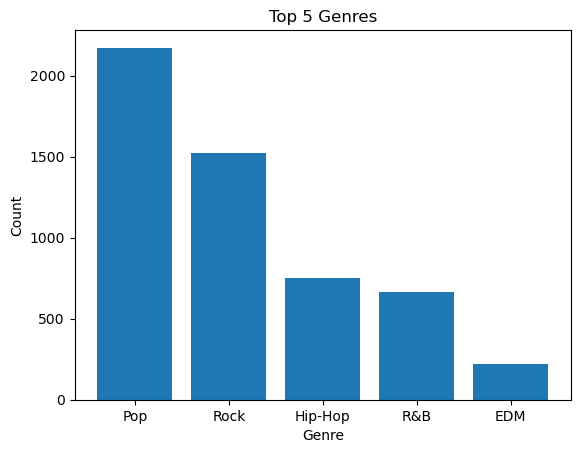

In [56]:
plt.bar(x='Genre',height='Count',data=top_5_genres)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Top 5 Genres');
### Pop seems to be the most prevalent genre in terms of count

## Most energetic genres on average

In [57]:
top_energy= spotifytracks.groupby('Main Genre')['Energy'].mean()

In [58]:
top_energy = top_energy.sort_values(ascending=False)

In [59]:
top_energy=top_energy.to_frame().reset_index()

In [60]:
top_energy

,Main Genre,Energy
0,Dance,0.814914
1,Punk,0.812081
2,EDM,0.792853
3,Heavy Metal,0.766000
4,K-Pop,0.741187
5,Reggaeton,0.740929
6,Electroinc,0.713000
7,Indie,0.701500
8,Rock,0.673167
9,Hip-Hop,0.670003


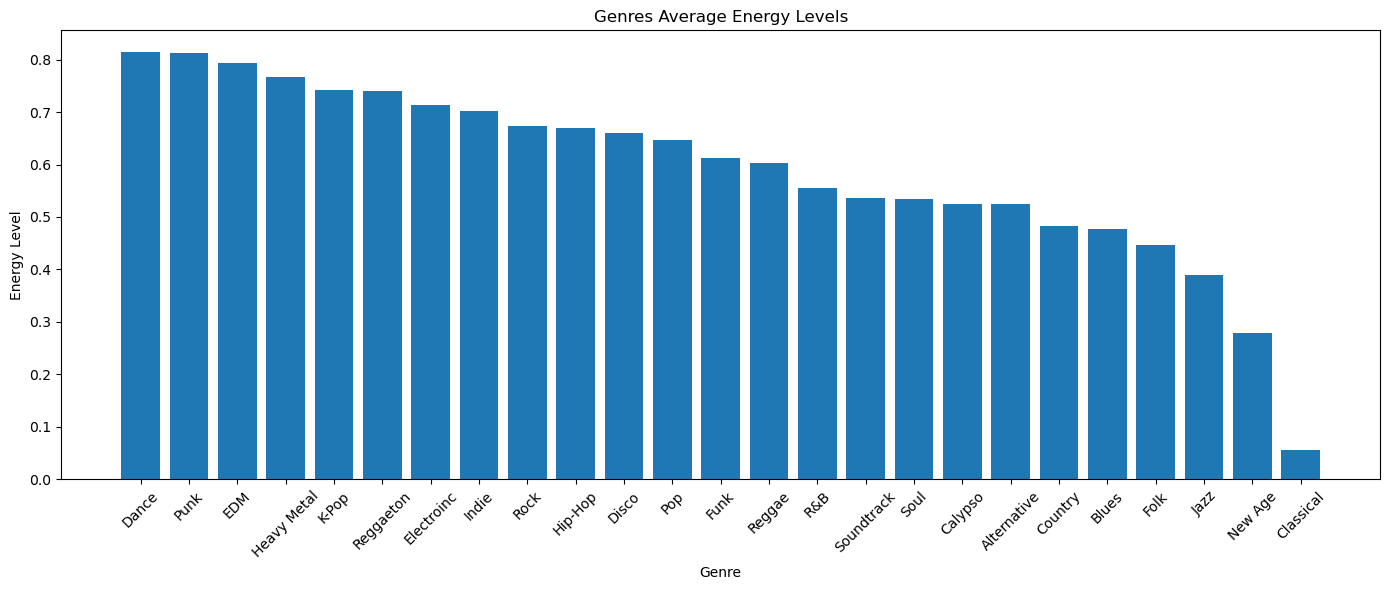

In [61]:
plt.figure(figsize=(14, 6))
plt.bar(top_energy['Main Genre'], top_energy['Energy'])
plt.xlabel('Genre')
plt.ylabel('Energy Level')
plt.title('Genres Average Energy Levels')
plt.xticks(rotation=45)
plt.tight_layout();

## Avearge valence score per decade

In [62]:
average_valence=spotifytracks[['Year','Valence']]

In [63]:
average_valence=average_valence.groupby(by='Year')['Valence'].mean()

In [64]:
average_valence=average_valence.to_frame().reset_index()

In [65]:
average_valence

,Year,Valence
0,1950,0.688860
1,1951,0.572837
2,1952,0.624523
3,1953,0.645907
4,1954,0.626614
...,...,...
68,2018,0.472952
69,2019,0.491188
70,2020,0.504184
71,2021,0.488950


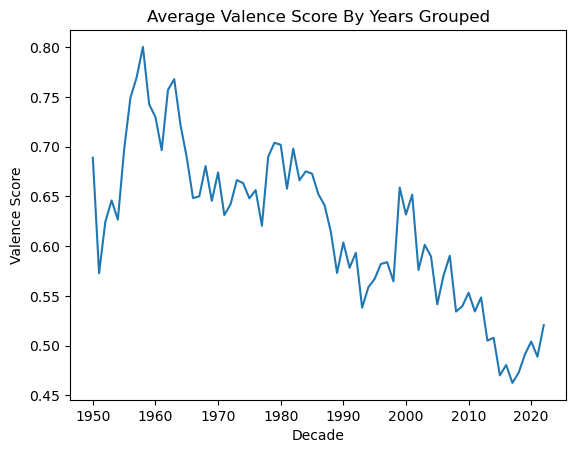

In [66]:
plt.plot('Year','Valence',data=average_valence)
plt.xlabel('Decade')
plt.ylabel('Valence Score')
plt.title ('Average Valence Score By Years Grouped');
##Aside from the ocassional uptick, it appears the valence score has gone down per decade.
##However overall valence has been above .6 for most decades.

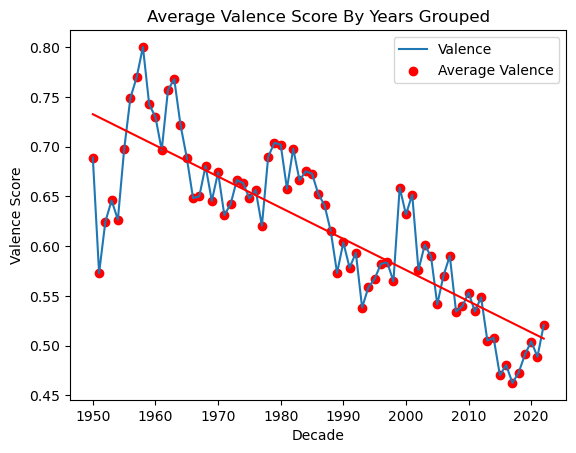

In [166]:
plt.plot('Year', 'Valence', data=average_valence)
plt.scatter('Year', 'Valence', data=average_valence, color='red', label='Average Valence')
plt.xlabel('Decade')
plt.ylabel('Valence Score')
plt.title('Average Valence Score By Years Grouped')
plt.legend()
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x),'r')

In [68]:
valence_distribution=spotifytracks[['Decade','Valence']]

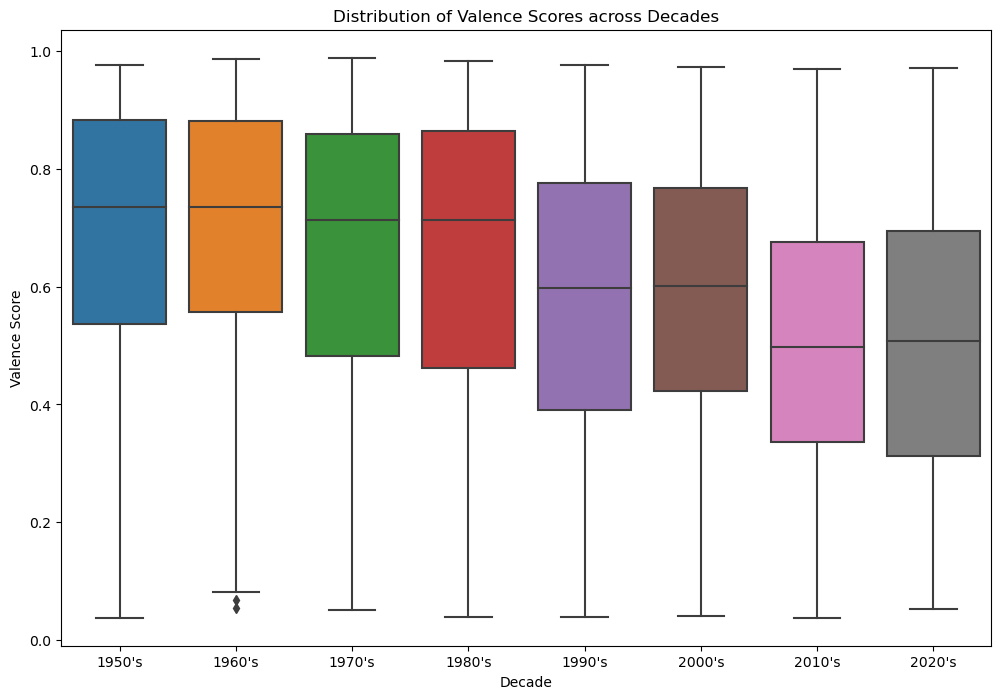

In [69]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=valence_distribution, x='Decade', y='Valence')
plt.title('Distribution of Valence Scores across Decades')
plt.xlabel('Decade')
plt.ylabel('Valence Score')
plt.show()
## Per the distrubution, the 1950's and 1960's seem to be about equal, but the 1960's having
## a slightly more positive valence score on average.

## Genres in each decade

In [70]:
genre_decades = spotifytracks.groupby(['Decade', 'Main Genre']).size().to_frame().reset_index()

In [71]:
genre_decades
genre_decades=genre_decades.rename(columns={'Decade':'Decade','Main Genre': 'Genre',0:'Count'})

In [72]:
genre_decades

,Decade,Genre,Count
0,1950's,Blues,139
1,1950's,Calypso,1
2,1950's,Classical,1
3,1950's,Country,25
4,1950's,Folk,2
...,...,...,...
108,2020's,Pop,177
109,2020's,R&B,14
110,2020's,Reggaeton,6
111,2020's,Rock,5


In [73]:
genre_decades=genre_decades.groupby('Decade', group_keys=False).apply(lambda x: x.nlargest(3, 'Count'))

In [74]:
chosen_palette = sns.color_palette("hls",8)

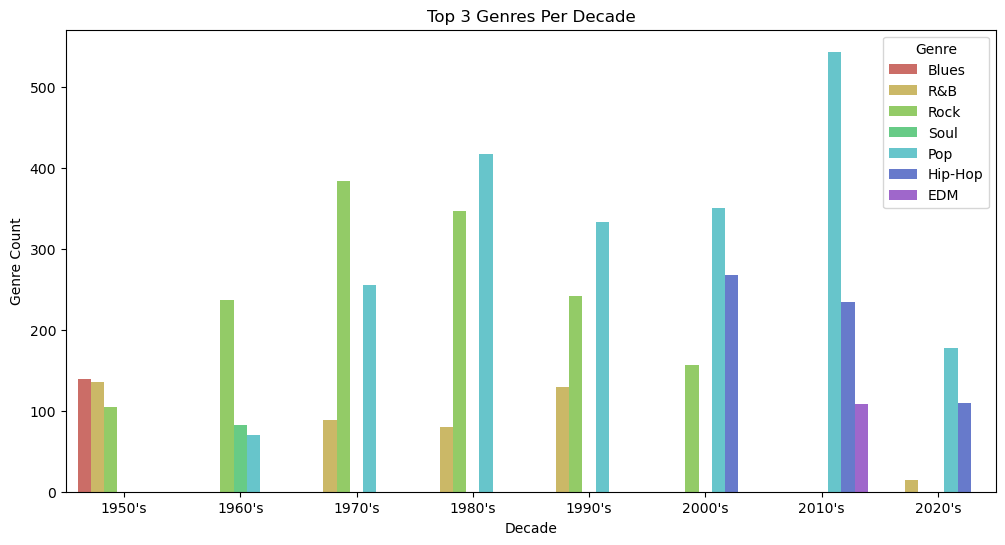

In [75]:
plt.figure(figsize=(12, 6))
sns.barplot(data=genre_decades, x='Decade', y='Count', hue='Genre', dodge=True, palette=chosen_palette)
plt.title('Top 3 Genres Per Decade')
plt.xlabel('Decade')
plt.ylabel('Genre Count')
plt.legend(title='Genre')
plt.show()
##Pop was on the rise in all decades (starting in the 1960's) except the decrease in the 2020's (so far)

## Coorelations

In [76]:
spotifycorr=spotifytracks.corr()

C:\Users\joshc\AppData\Local\Temp\ipykernel_21400\1825678636.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  spotifycorr=spotifytracks.corr()


In [77]:
spotifycorr
## There appears to be some slight correlation between Valence and danceability,energy.

,Popularity,Acousticness,Danceability,Loudness,Valence,Energy,Liveness,Tempo,Explicit,Instrumentalness,Year,Duration(mins)
Popularity,1.000000,-0.369815,0.141909,0.286283,-0.151973,0.210843,-0.050840,0.013590,0.209737,-0.059447,0.596133,0.173576
Acousticness,-0.369815,1.000000,-0.259382,-0.418679,-0.118696,-0.595540,-0.015976,-0.066761,-0.175028,-0.046056,-0.470968,-0.224692
Danceability,0.141909,-0.259382,1.000000,0.145066,0.407138,0.158417,-0.099477,-0.193716,0.244072,-0.012734,0.263154,-0.008111
Loudness,0.286283,-0.418679,0.145066,1.000000,0.047073,0.676358,0.062384,0.057934,0.221281,-0.079759,0.497817,-0.052168
Valence,-0.151973,-0.118696,0.407138,0.047073,1.000000,0.339249,0.035492,0.031515,-0.102989,0.020848,-0.270602,-0.179396
Energy,0.210843,-0.595540,0.158417,0.676358,0.339249,1.000000,0.123726,0.119818,0.060560,0.050465,0.278181,0.040220
Liveness,-0.050840,-0.015976,-0.099477,0.062384,0.035492,0.123726,1.000000,0.000526,0.027935,-0.007090,-0.037199,-0.013614
Tempo,0.013590,-0.066761,-0.193716,0.057934,0.031515,0.119818,0.000526,1.000000,-0.015721,0.023666,-0.003256,-0.028323
Explicit,0.209737,-0.175028,0.244072,0.221281,-0.102989,0.060560,0.027935,-0.015721,1.000000,-0.073095,0.376228,0.017399
Instrumentalness,-0.059447,-0.046056,-0.012734,-0.079759,0.020848,0.050465,-0.007090,0.023666,-0.073095,1.000000,-0.080776,0.088101


In [78]:
correlation_energy = spotifytracks['Valence'].corr(spotifytracks['Energy'])

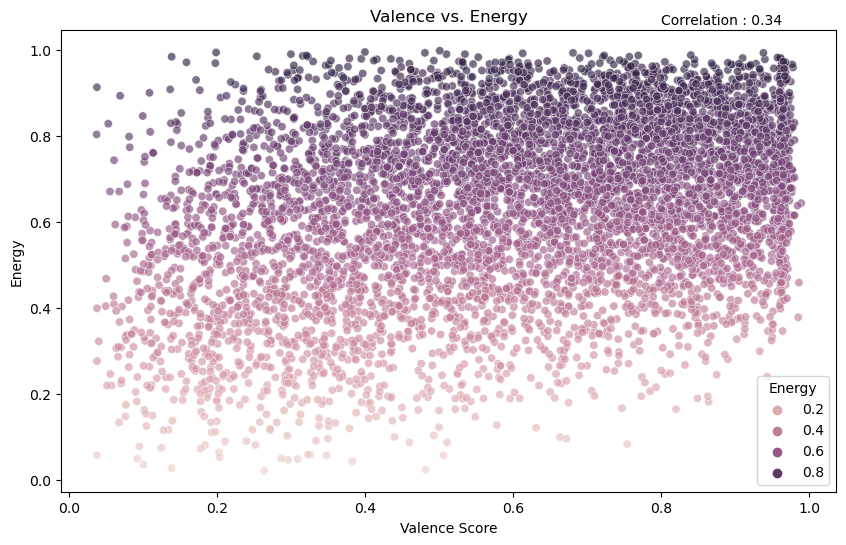

In [79]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=spotifytracks, x='Valence', y='Energy',hue='Energy',alpha=0.65)
plt.title('Valence vs. Energy')
plt.xlabel('Valence Score')
plt.ylabel('Energy')
plt.text(0.8, 1.06, f'Correlation : {correlation_energy:.2f}');

In [80]:
correlation_danceability = spotifytracks['Valence'].corr(spotifytracks['Danceability'])

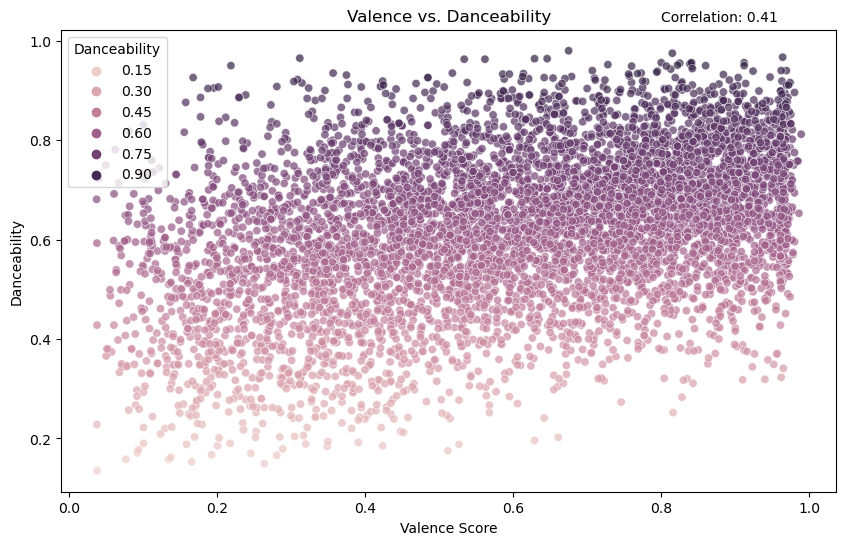

In [81]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=spotifytracks, x='Valence', y='Danceability',hue='Danceability',alpha=0.7)
plt.title('Valence vs. Danceability')
plt.xlabel('Valence Score')
plt.ylabel('Danceability')
plt.text(0.8, 1.04, f'Correlation: {correlation_danceability:.2f}');

## Average song length per decade

In [82]:
average_duration=spotifytracks[['Year','Duration(mins)']]

In [83]:
average_duration=average_duration.groupby('Year')['Duration(mins)'].mean().to_frame().reset_index()

In [84]:
average_duration

,Year,Duration(mins)
0,1950,2.914600
1,1951,2.844694
2,1952,2.788182
3,1953,2.839535
4,1954,2.854091
...,...,...
68,2018,3.472300
69,2019,3.290100
70,2020,3.282815
71,2021,3.277200


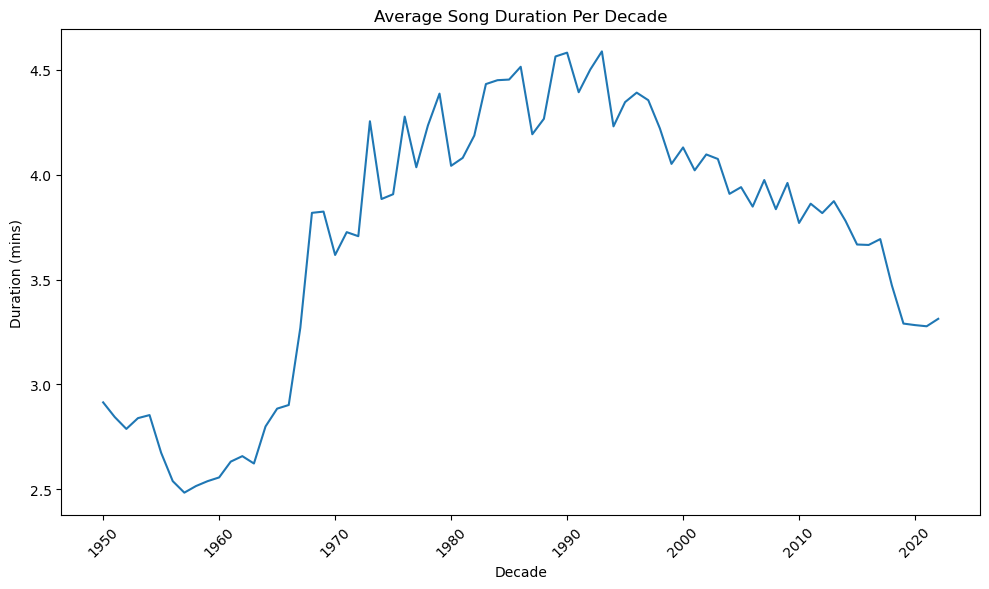

In [85]:
plt.figure(figsize=(10, 6))
plt.plot(average_duration['Year'], average_duration['Duration(mins)'])
plt.xlabel('Decade')
plt.ylabel('Duration (mins)')
plt.title('Average Song Duration Per Decade')
plt.xticks(rotation=45)
plt.tight_layout();
## Song duration has gone up in the top hits through the decades.
## The average length of a song appears to be around three minutes in the 1950's vs. 
## the current decade over three minutes. While the correlation above does not show any
## relationship between valence and duration, if the 50's are indeed the most positive decade
## then one could argue that shorter songs were a contributing factors.

In [86]:
spotifytracks['Valence'].mean()
#Overall the average valance score seems to be pretty positive

0.6066779122779437

In [87]:
valence2=spotifytracks[['Decade','Valence']]

In [88]:
valence2=valence2.groupby(by='Decade')['Valence'].mean().to_frame().reset_index()

In [89]:
valence2

,Decade,Valence
0,1950's,0.693334
1,1960's,0.696652
2,1970's,0.659566
3,1980's,0.655303
4,1990's,0.582897
5,2000's,0.582676
6,2010's,0.502019
7,2020's,0.504572


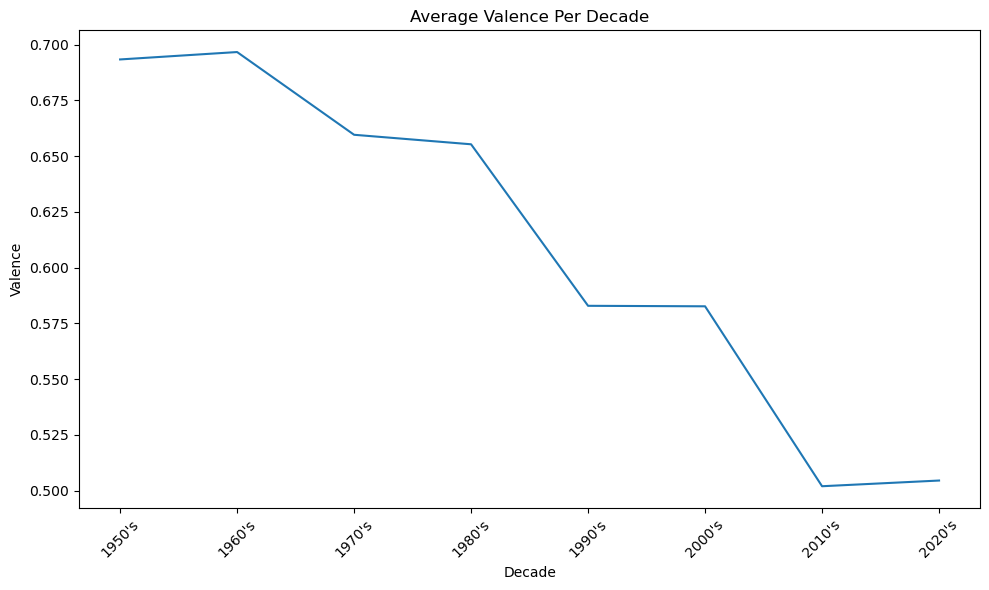

In [90]:
plt.figure(figsize=(10, 6))
plt.plot(valence2['Decade'], valence2['Valence'])
plt.xlabel('Decade')
plt.ylabel('Valence')
plt.title('Average Valence Per Decade')
plt.xticks(rotation=45)
plt.tight_layout();
##This graph further confirms the 1960's being the most positive based on valence.

## To more easily categorize the valence scores, we will round the values provided.

In [91]:
##Rounding valence score to two decimal points to categorize
spotifytracks['Valence']=round(spotifytracks['Valence'],2)

In [92]:
spotifytracks.head(5)

,Title,Artist,Album,Popularity,Track URL,Acousticness,Danceability,Loudness,Valence,Energy,Liveness,Tempo,Explicit,Instrumentalness,Sub_Genre,Main Genre,Year,Decade,Duration(mins)
0,"Bad, Bad Whiskey",Amos Milburn,Let's Have A Party! (The Aladdin Recordings),25,https://open.spotify.com/track/1XByDNjGTqsqkl7...,0.974,0.874,-10.500,0.66,0.246,0.1320,115.146,False,0.0111,piano blues,Blues,1950,1950's,2.92
1,"One Scotch, One Bourbon, One Beer",Amos Milburn,Down The Road Apiece -The Best Of Amos Milburn,50,https://open.spotify.com/track/1T7ZI5Z9XHFeSZU...,0.811,0.908,-17.630,0.28,0.133,0.0707,118.678,False,0.0938,piano blues,Blues,1953,1950's,2.94
2,Let Me Go Home Whiskey,Amos Milburn,Let's Have A Party! (The Aladdin Recordings),29,https://open.spotify.com/track/33343QHpDEcf022...,0.976,0.908,-12.726,0.72,0.366,0.1320,121.300,False,0.0129,piano blues,Blues,1953,1950's,2.80
3,Stack-A'Lee,Archibald,"Saga Blues: New Orleans Rhythm and Blues ""Good...",3,https://open.spotify.com/track/141cfH3W9II7dWJ...,0.991,0.802,-15.019,0.78,0.206,0.1240,125.915,False,0.8950,new orleans soul,Soul,1950,1950's,4.50
4,My Baby Left Me - Remastered 2003,"Arthur ""Big Boy"" Crudup",Rock Me Mama - When The Sun Goes Down Series,36,https://open.spotify.com/track/5WgAbfjSEt2ycl9...,0.810,0.788,-11.888,0.84,0.526,0.0975,108.290,False,0.0000,blues,Blues,1951,1950's,2.35


## Categorizing valence scores

In [93]:
## Loop function to categorize valence scores
def positive_category(valence):
     if 0.50 <= valence <= 1.0:
        return "Positive"
     if 0.35 <= valence <= 0.499:
        return "Neutral"
     if 0.0 <= valence <= 0.49:
        return "Negative"
     else:
        return "Other"

In [94]:
spotifytracks['Emotion Category'] = spotifytracks['Valence'].apply(positive_category)

In [95]:
spotifytracks

,Title,Artist,Album,Popularity,Track URL,Acousticness,Danceability,Loudness,Valence,Energy,Liveness,Tempo,Explicit,Instrumentalness,Sub_Genre,Main Genre,Year,Decade,Duration(mins),Emotion Category
0,"Bad, Bad Whiskey",Amos Milburn,Let's Have A Party! (The Aladdin Recordings),25,https://open.spotify.com/track/1XByDNjGTqsqkl7...,0.9740,0.874,-10.500,0.66,0.246,0.1320,115.146,False,0.01110,piano blues,Blues,1950,1950's,2.92,Positive
1,"One Scotch, One Bourbon, One Beer",Amos Milburn,Down The Road Apiece -The Best Of Amos Milburn,50,https://open.spotify.com/track/1T7ZI5Z9XHFeSZU...,0.8110,0.908,-17.630,0.28,0.133,0.0707,118.678,False,0.09380,piano blues,Blues,1953,1950's,2.94,Negative
2,Let Me Go Home Whiskey,Amos Milburn,Let's Have A Party! (The Aladdin Recordings),29,https://open.spotify.com/track/33343QHpDEcf022...,0.9760,0.908,-12.726,0.72,0.366,0.1320,121.300,False,0.01290,piano blues,Blues,1953,1950's,2.80,Positive
3,Stack-A'Lee,Archibald,"Saga Blues: New Orleans Rhythm and Blues ""Good...",3,https://open.spotify.com/track/141cfH3W9II7dWJ...,0.9910,0.802,-15.019,0.78,0.206,0.1240,125.915,False,0.89500,new orleans soul,Soul,1950,1950's,4.50,Positive
4,My Baby Left Me - Remastered 2003,"Arthur ""Big Boy"" Crudup",Rock Me Mama - When The Sun Goes Down Series,36,https://open.spotify.com/track/5WgAbfjSEt2ycl9...,0.8100,0.788,-11.888,0.84,0.526,0.0975,108.290,False,0.00000,blues,Blues,1951,1950's,2.35,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,Falling,Trevor Daniel,Nicotine,2,https://open.spotify.com/track/2rRJrJEo19S2J82...,0.1230,0.784,-8.756,0.24,0.430,0.0887,127.087,False,0.00000,melodic rap,Hip-Hop,2020,2020's,2.66,Negative
331,Past Life (with Selena Gomez),Trevor Daniel,Past Life (with Selena Gomez),65,https://open.spotify.com/track/7MN8RYSofZsFROB...,0.1020,0.575,-5.062,0.28,0.543,0.1760,159.905,False,0.00000,melodic rap,Hip-Hop,2020,2020's,3.11,Negative
332,Level of Concern,Twenty One Pilots,Level of Concern,69,https://open.spotify.com/track/6xZ4Q2k2ompmDpp...,0.3200,0.754,-7.340,0.77,0.583,0.1440,122.012,False,0.00015,pop,Hip-Hop,2020,2020's,3.67,Positive
333,t r a n s p a r e n t s o u l feat. Travis Barker,WILLOW,t r a n s p a r e n t s o u l feat. Travis Barker,67,https://open.spotify.com/track/1QL7nSDZCwZMnbi...,0.0021,0.390,-5.201,0.19,0.830,0.1560,90.021,True,0.00000,pop,Pop,2021,2020's,2.80,Negative


In [96]:
valence_categories=spotifytracks['Emotion Category'].value_counts().to_frame().reset_index()

In [97]:
valence_categories=valence_categories.rename(columns={'index':'Emotion Category','Emotion Category':'Count'})

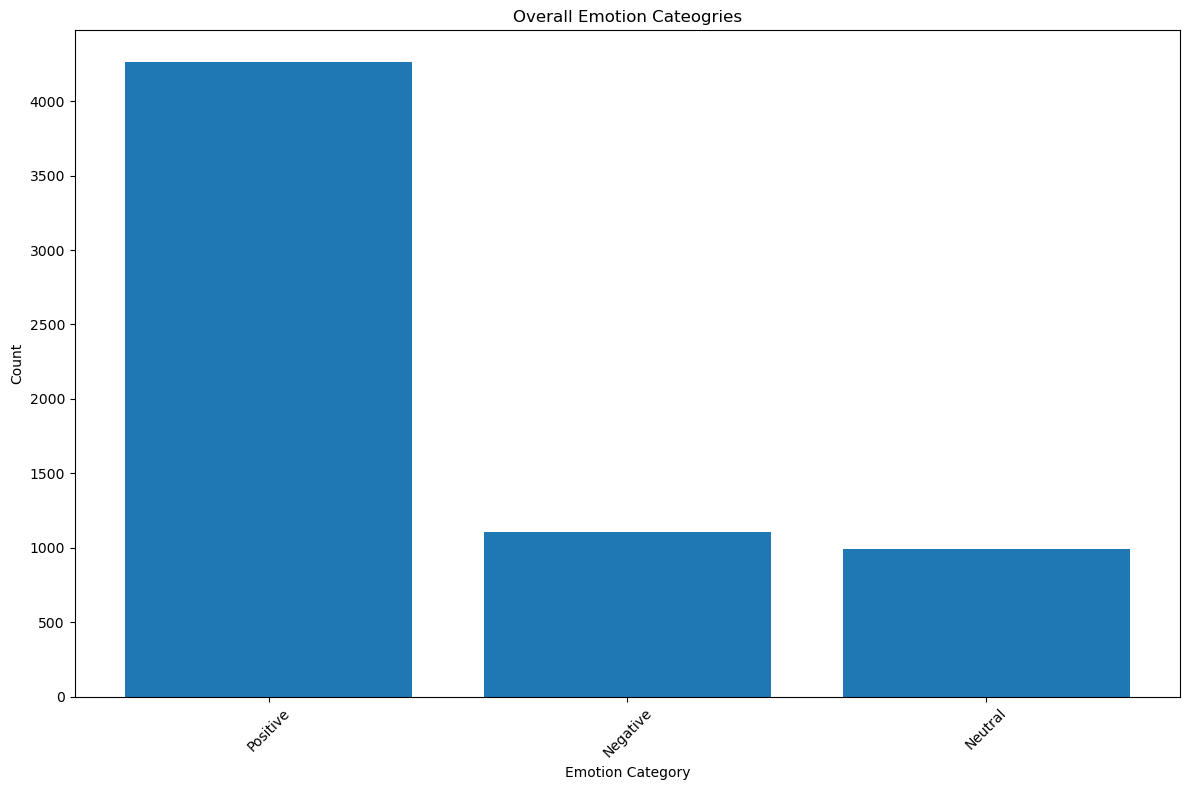

In [98]:
plt.figure(figsize=(12, 8))
plt.bar(valence_categories['Emotion Category'],valence_categories['Count'])
plt.xlabel('Emotion Category')
plt.ylabel('Count')
plt.title('Overall Emotion Cateogries')
plt.xticks(rotation=45)
plt.tight_layout();
##As previously mentioned, most songs fall into happy/joyous category.

## Now that we see the average valence per decade and have categorized the valence scores, we will now find the highest valence score decade.

In [99]:
valence_decade = spotifytracks.groupby('Decade')['Valence'].mean()

In [100]:
highest_valence_decade = valence_decade.idxmax()
highest_valence_score = round(valence_decade.max(),3)

In [101]:
print('highest valence decade is the',highest_valence_decade)
print('highest valence score on average is', highest_valence_score)

highest valence decade is the 1960's
highest valence score on average is 0.697


In [102]:
##Graphing it one more time for visual
new_valence=spotifytracks[['Decade','Valence']]
new_valence=new_valence.groupby(by='Decade')['Valence'].mean()

In [103]:
new_valence=new_valence.to_frame().reset_index()

In [104]:
new_valence

,Decade,Valence
0,1950's,0.693235
1,1960's,0.696743
2,1970's,0.659570
3,1980's,0.655320
4,1990's,0.582913
5,2000's,0.582623
6,2010's,0.502155
7,2020's,0.504299


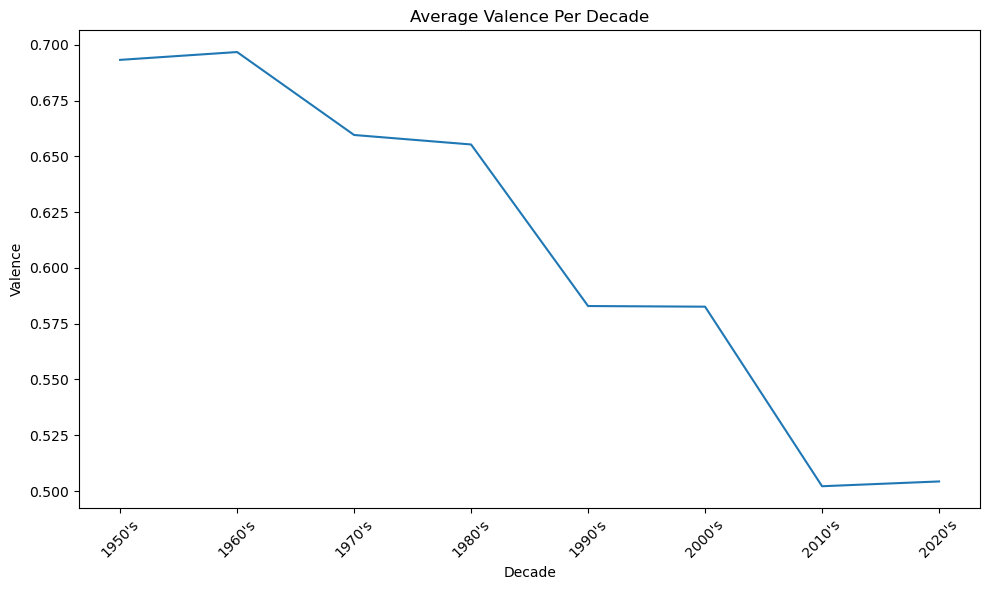

In [105]:
plt.figure(figsize=(10, 6))
plt.plot(new_valence['Decade'], new_valence['Valence'])
plt.xlabel('Decade')
plt.ylabel('Valence')
plt.title('Average Valence Per Decade')
plt.xticks(rotation=45)
plt.tight_layout();
#Still showing the same after rounding the valence scores.

## Finding the top tracks for the 1960's

In [106]:
sixties=spotifytracks.loc[spotifytracks['Decade']=="1960's"]

In [107]:
sixties.head()

,Title,Artist,Album,Popularity,Track URL,Acousticness,Danceability,Loudness,Valence,Energy,Liveness,Tempo,Explicit,Instrumentalness,Sub_Genre,Main Genre,Year,Decade,Duration(mins),Emotion Category
0,96 Tears,? and The Mysterians,96 Tears,57,https://open.spotify.com/track/4PEeZ2U4UfP2Jo8...,0.0624,0.650,-5.965,0.88,0.562,0.0760,123.674,False,0.000032,classic garage rock,Rock,1966,1960's,2.95,Positive
1,You're Gonna Miss Me (2008 Remastered Original...,13th Floor Elevators,The Psychedelic Sounds of the 13th Floor Eleva...,55,https://open.spotify.com/track/34miSNKQ0xN7EG8...,0.0108,0.428,-4.454,0.68,0.923,0.0985,151.005,False,0.436000,protopunk,Rock,1966,1960's,2.45,Positive
2,Tell It Like It Is,Aaron Neville,Tell It Like It Is - The Par Lo Years,55,https://open.spotify.com/track/7GSRH3L0HAM3Stk...,0.4490,0.610,-9.194,0.56,0.376,0.1980,93.706,False,0.000002,new orleans soul,Soul,1966,1960's,2.77,Positive
3,Tighten Up,Archie Bell and The Drells,Atlantic Top 60: Sweat-Soaked Soul Classics,38,https://open.spotify.com/track/0qKCm8yeHoRJTpr...,0.2890,0.624,-6.365,0.79,0.695,0.1440,122.938,False,0.000259,northern soul,Soul,1967,1960's,3.18,Positive
4,Respect,Aretha Franklin,I Never Loved a Man the Way I Love You,80,https://open.spotify.com/track/7s25THrKz86DM22...,0.1640,0.805,-5.226,0.96,0.558,0.0546,114.950,False,0.000022,jazz blues,Blues,1967,1960's,2.46,Positive


In [108]:
max_valence_in_sixties = sixties['Valence'].max()

In [109]:
print("the highest valence scores in the 1960's was",max_valence_in_sixties)

the highest valence scores in the 1960's was 0.99


In [110]:
most_positive_song_sixties=sixties.loc[sixties['Valence']==0.99]
most_positive_track= most_positive_song_sixties['Title'].iloc[0]
artist = most_positive_song_sixties['Artist'].iloc[0]
genre = most_positive_song_sixties['Main Genre'].iloc[0]

In [111]:
print("the most positive song in the 1960's was",most_positive_track)
print('by',artist )
print('Genre:',genre)

the most positive song in the 1960's was Pressure Drop
by Toots and The Maytals
Genre: Reggae


## Looking at genre trends throughout the decades. The Top 5 for each decade.

In [112]:
fifties=spotifytracks.loc[spotifytracks['Decade']=="1950's"]

In [113]:
genre_counts50s = fifties['Main Genre'].value_counts().reset_index()
genre_counts50s.columns = ['Main Genre', 'Count']

In [114]:
top_genres50s = genre_counts50s.nlargest(5, 'Count')

In [115]:
print(top_genres50s)

  Main Genre  Count
0      Blues    139
1        R&B    135
2       Rock    105
3        Pop     27
4    Country     25


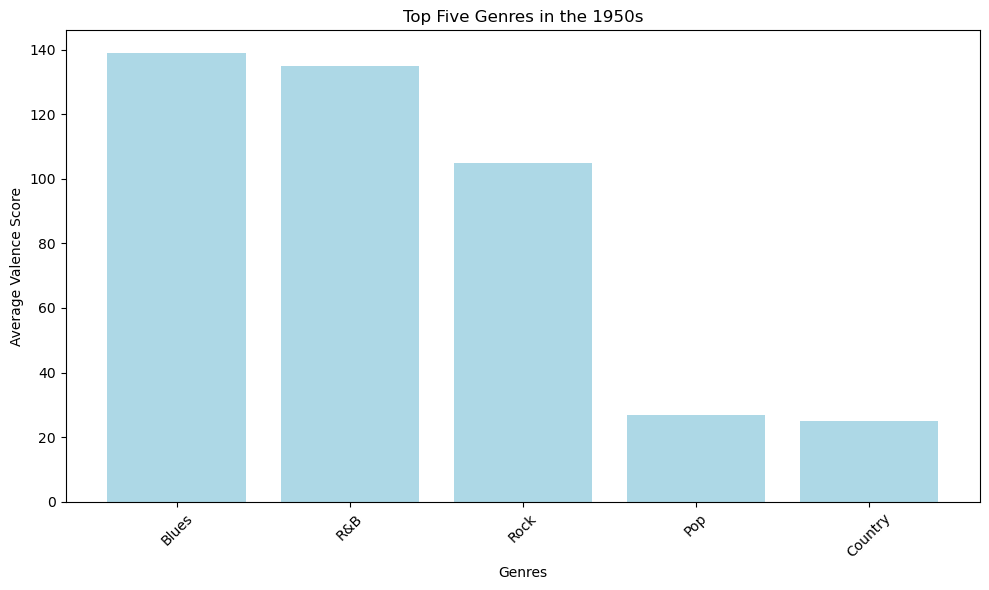

In [116]:
plt.figure(figsize=(10, 6))
plt.bar(top_genres50s['Main Genre'], top_genres50s['Count'], color='lightblue')
plt.xlabel('Genres')
plt.ylabel('Average Valence Score')
plt.title('Top Five Genres in the 1950s')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [117]:
sixties=spotifytracks.loc[spotifytracks['Decade']=="1960's"]

In [118]:
genre_counts60s = sixties['Main Genre'].value_counts().reset_index()
genre_counts60s.columns = ['Main Genre', 'Count']

In [119]:
top_genres60s = genre_counts60s.nlargest(5, 'Count')

In [120]:
print(top_genres60s)

  Main Genre  Count
0       Rock    237
1       Soul     82
2        Pop     70
3        R&B     67
4       Funk     19


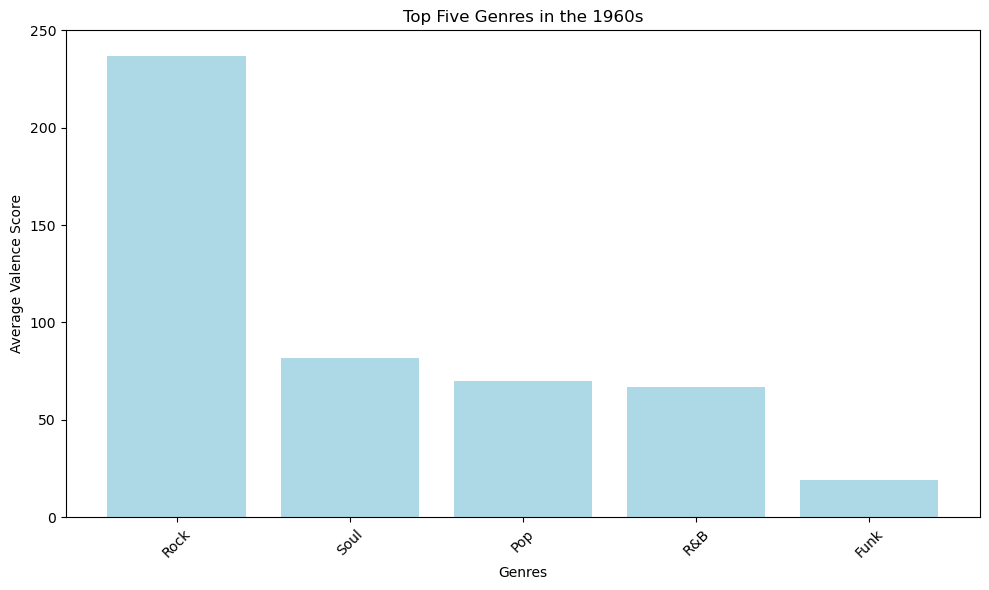

In [121]:
plt.figure(figsize=(10, 6))
plt.bar(top_genres60s['Main Genre'], top_genres60s['Count'], color='lightblue')
plt.xlabel('Genres')
plt.ylabel('Average Valence Score')
plt.title('Top Five Genres in the 1960s')
plt.xticks(rotation=45)
plt.ylim(0,250)
plt.tight_layout()
plt.show()

In [122]:
seventies=spotifytracks.loc[spotifytracks['Decade']=="1970's"]

In [123]:
genre_counts70s = seventies['Main Genre'].value_counts().reset_index()
genre_counts70s.columns = ['Main Genre', 'Count']

In [124]:
top_genres70s = genre_counts70s.nlargest(5, 'Count')

In [125]:
print(top_genres70s)

  Main Genre  Count
0       Rock    383
1        Pop    255
2        R&B     89
3       Soul     82
4      Disco     52


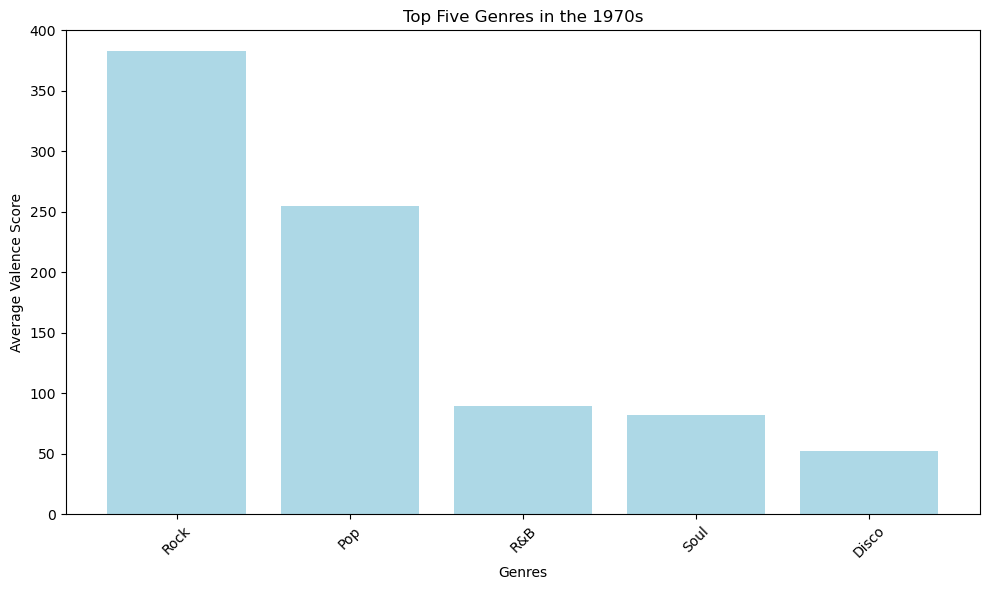

In [126]:
plt.figure(figsize=(10, 6))
plt.bar(top_genres70s['Main Genre'], top_genres70s['Count'], color='lightblue')
plt.xlabel('Genres')
plt.ylabel('Average Valence Score')
plt.title('Top Five Genres in the 1970s')
plt.xticks(rotation=45)
plt.ylim(0,400)
plt.tight_layout()
plt.show()

In [127]:
eighties=spotifytracks.loc[spotifytracks['Decade']=="1980's"]

In [128]:
genre_counts80s = eighties['Main Genre'].value_counts().reset_index()
genre_counts80s.columns = ['Main Genre', 'Count']

In [129]:
top_genres80s = genre_counts80s.nlargest(5, 'Count')

In [130]:
print(top_genres80s)

  Main Genre  Count
0        Pop    417
1       Rock    347
2        R&B     80
3       Funk     25
4    Hip-Hop     20


<function matplotlib.pyplot.show(close=None, block=None)>

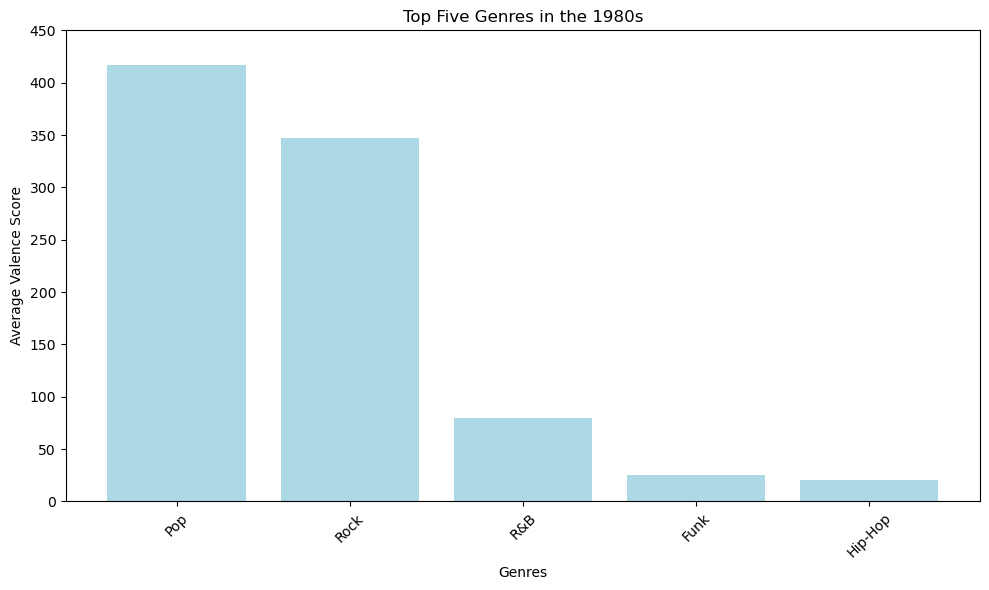

In [131]:
plt.figure(figsize=(10, 6))
plt.bar(top_genres80s['Main Genre'], top_genres80s['Count'], color='lightblue')
plt.xlabel('Genres')
plt.ylabel('Average Valence Score')
plt.title('Top Five Genres in the 1980s')
plt.xticks(rotation=45)
plt.ylim(0,450)
plt.tight_layout()
plt.show
#Starting to see a trend here.

In [132]:
nineties=spotifytracks.loc[spotifytracks['Decade']=="1990's"]

In [133]:
genre_counts90s = nineties['Main Genre'].value_counts().reset_index()
genre_counts90s.columns = ['Main Genre', 'Count']

In [134]:
top_genres90s = genre_counts90s.nlargest(5, 'Count')

In [135]:
print(top_genres90s)

  Main Genre  Count
0        Pop    333
1       Rock    242
2        R&B    129
3    Hip-Hop    120
4      Dance     66


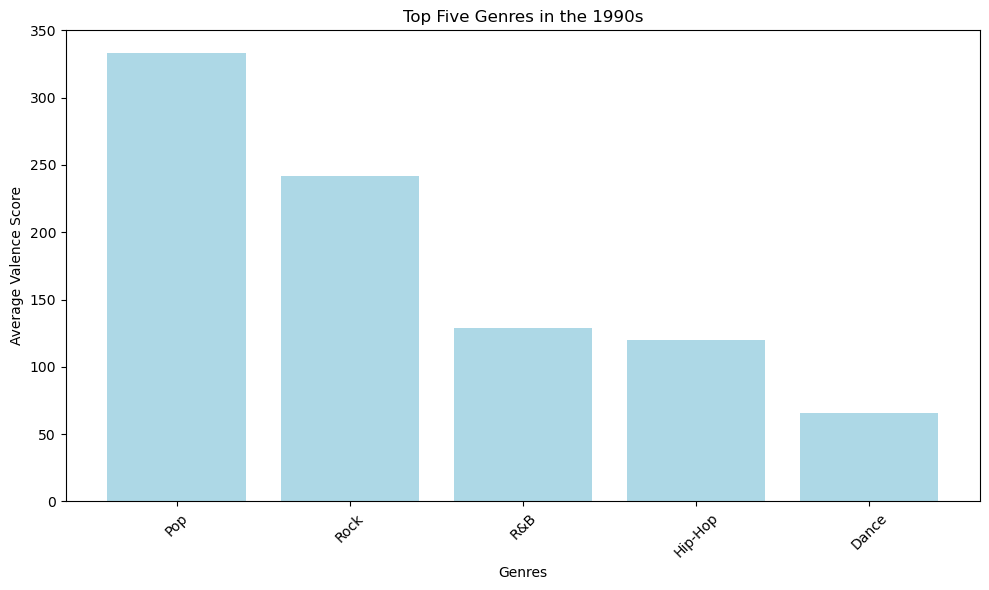

In [136]:
plt.figure(figsize=(10, 6))
plt.bar(top_genres90s['Main Genre'], top_genres90s['Count'], color='lightblue')
plt.xlabel('Genres')
plt.ylabel('Average Valence Score')
plt.title('Top Five Genres in the 1990s')
plt.xticks(rotation=45)
plt.ylim(0,350)
plt.tight_layout()
plt.show()

In [137]:
thousands=spotifytracks.loc[spotifytracks['Decade']=="2000's"]

In [138]:
genre_counts00s = thousands['Main Genre'].value_counts().reset_index()
genre_counts00s.columns = ['Main Genre', 'Count']

In [139]:
top_genres00s = genre_counts00s.nlargest(5, 'Count')

In [140]:
print(top_genres00s)

  Main Genre  Count
0        Pop    350
1    Hip-Hop    268
2       Rock    156
3        R&B    109
4        EDM     39


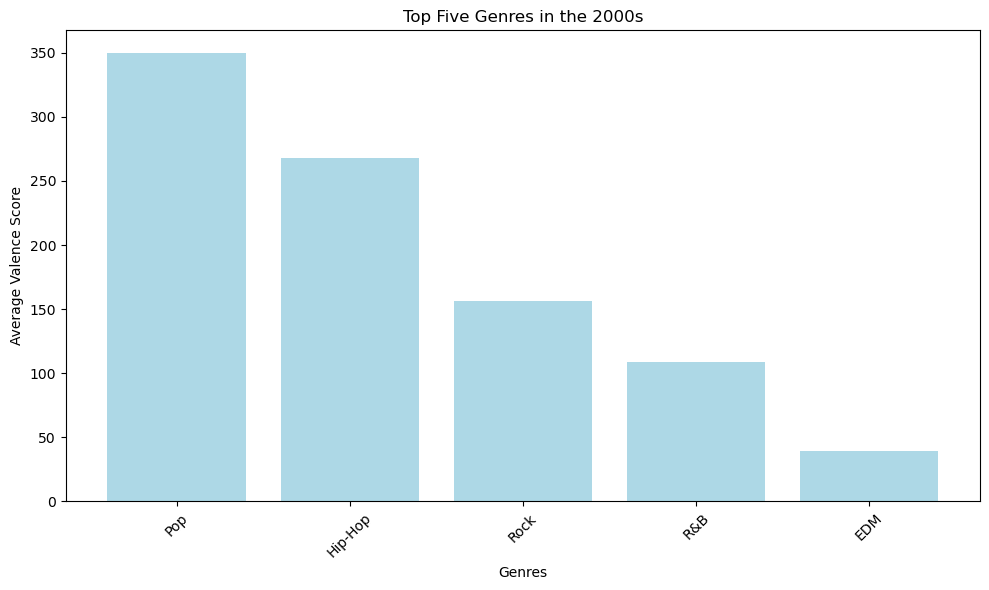

In [141]:
plt.figure(figsize=(10, 6))
plt.bar(top_genres00s['Main Genre'], top_genres00s['Count'], color='lightblue')
plt.xlabel('Genres')
plt.ylabel('Average Valence Score')
plt.title('Top Five Genres in the 2000s')
plt.xticks(rotation=45)
plt.ylim(0,)
plt.tight_layout()
plt.show()

In [142]:
the10s=spotifytracks.loc[spotifytracks['Decade']=="2010's"]

In [143]:
genre_counts10s = the10s['Main Genre'].value_counts().reset_index()
genre_counts10s.columns = ['Main Genre', 'Count']

In [144]:
top_genres10s = genre_counts10s.nlargest(5, 'Count')

In [145]:
print(top_genres10s)

  Main Genre  Count
0        Pop    543
1    Hip-Hop    234
2        EDM    108
3       Rock     48
4        R&B     42


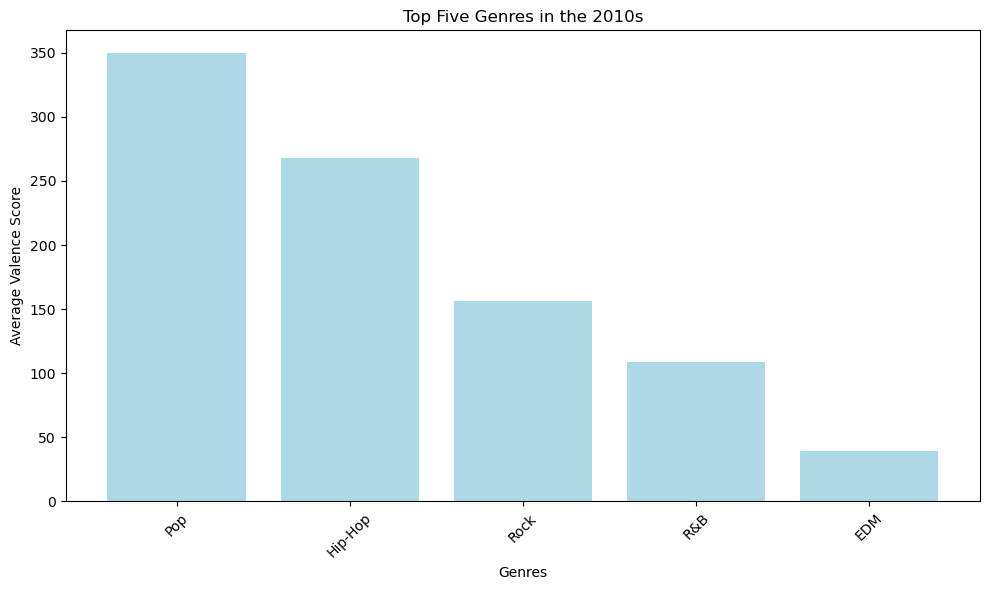

In [146]:
plt.figure(figsize=(10, 6))
plt.bar(top_genres00s['Main Genre'], top_genres00s['Count'], color='lightblue')
plt.xlabel('Genres')
plt.ylabel('Average Valence Score')
plt.title('Top Five Genres in the 2010s')
plt.xticks(rotation=45)
plt.ylim(0,)
plt.tight_layout()
plt.show()

In [147]:
thetwenties=spotifytracks.loc[spotifytracks['Decade']=="2020's"]

In [148]:
genre_counts20s = thetwenties['Main Genre'].value_counts().reset_index()
genre_counts20s.columns = ['Main Genre', 'Count']

In [149]:
top_genres20s = genre_counts20s.nlargest(5, 'Count')

In [150]:
print(top_genres20s)

  Main Genre  Count
0        Pop    177
1    Hip-Hop    109
2        R&B     14
3      K-Pop     13
4        EDM     10


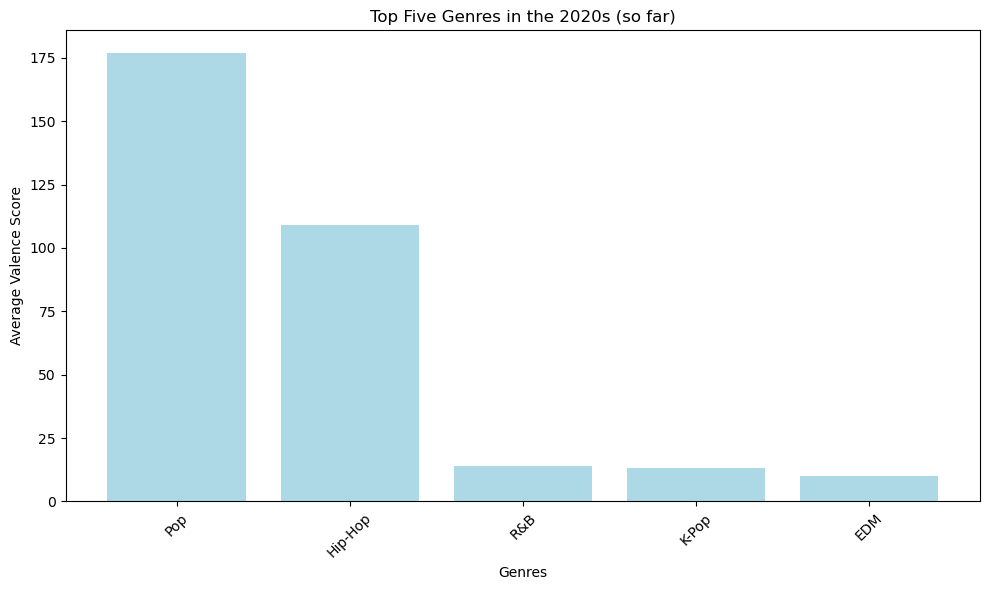

In [151]:
plt.figure(figsize=(10, 6))
plt.bar(top_genres20s['Main Genre'], top_genres20s['Count'], color='lightblue')
plt.xlabel('Genres')
plt.ylabel('Average Valence Score')
plt.title('Top Five Genres in the 2020s (so far)')
plt.xticks(rotation=45)
plt.ylim(0,)
plt.tight_layout()
plt.show()